#Pergunta fundamental

<a target="_blank" href="https://colab.research.google.com/github/glaucogoncalves/p-e/blob/main/lectures/05_probability_distributions.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/> </a>

Cada VA é única ou existem padrões?

# Para quê usamos VAs?

* Nos encontros anteriores mostramos como construir uma VA do zero a partir de um experimento
* Mas nem sempre queremos isso. Então é comum usarmos distribuições de probabilidade específicas para cada fenômeno
* Nós temos muitas distribuições que já foram mapeadas ao longo do tempo, veremos algumas aqui

#Distribuições discretas

## Distribuição Uniforme discreta

Uma VA que pode assumir $n$ diferentes valores discretos entre $[a,b]$, cada um com a mesma probabilidade $\frac{1}{b-a+1}$ (ex: um dado justo), qualquer outro valor tem probabilidade zero.

Para detalhes sobre o uso das funções de probabilidade na biblioteca Scipy acessar https://docs.scipy.org/doc/scipy/reference/stats.html

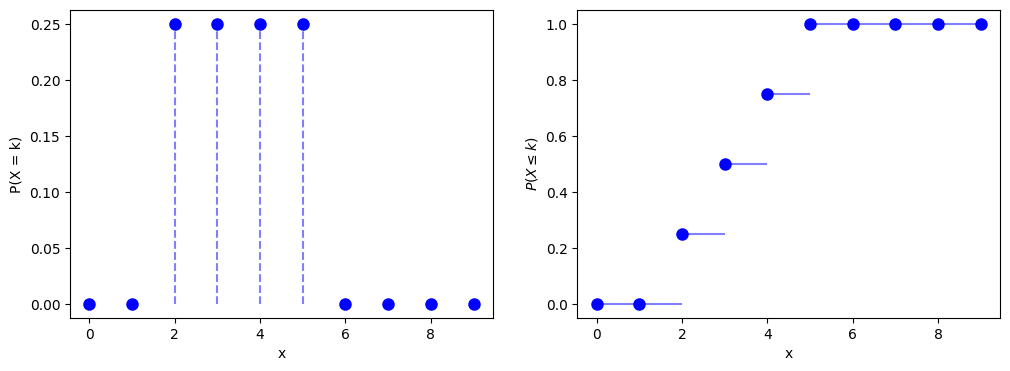

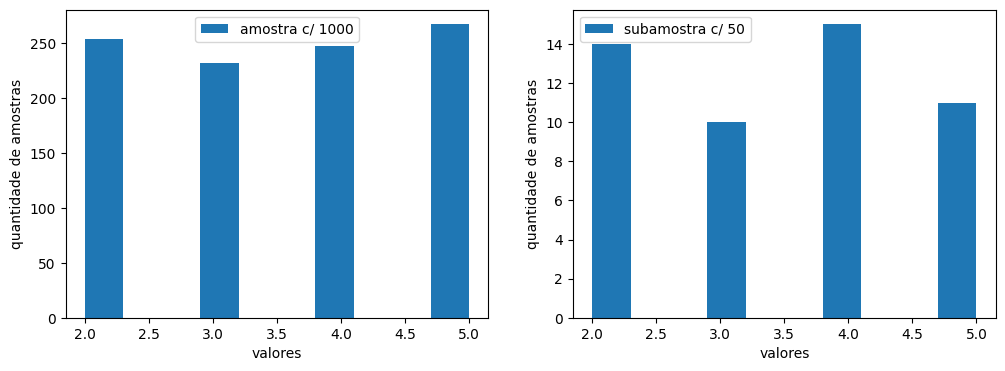

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import random

def plotDistribuicao(x,fx,Fx):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.plot(x,f,'bo',ms=8)
  plt.vlines(x, 0, f, linestyles="--", colors='b', alpha=0.5)
  plt.xlabel("x")
  plt.ylabel("P(X = k)")

  plt.subplot(1,2,2)
  plt.plot(x,F,'bo',ms=8)
  q = list(x)
  q = q[1:]
  q.append(x[-1])
  plt.hlines(F, x, q, linestyles="-", colors='b', alpha=0.5)
  plt.xlabel("x")
  plt.ylabel("$P(X \leq k)$")
  plt.show()

def histograma(dados):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  x = random.sample(list(dados),int(len(dados)*0.05))
  plt.hist(dados,label="amostra c/ 1000")
  plt.legend()
  plt.xlabel("valores")
  plt.ylabel("quantidade de amostras")
  plt.subplot(1,2,2)
  plt.hist(x,label="subamostra c/ 50")
  plt.legend()
  plt.xlabel("valores")
  plt.ylabel("quantidade de amostras")

x = range(0,10)
a = 2
b = 5
f = st.randint.pmf(x,a,b+1) #ATENÇÃO: na lib scipy, a uniforme é definida com b+1
F = st.randint.cdf(x,a,b+1)
plotDistribuicao(x,f,F)
dados = st.randint.rvs(a,b+1,size=1000)
histograma(dados)

A vantagem de usar distribuições já conhecidas é que suas propriedades são também conhecidas. No caso da uniforme discreta temos:

* Média: $\frac{a+b}{2}$
* Variância: $\frac{n^2-1}{12}$, onde $n=b-a+1$
* Distribuição de probabilidade: $P(X=k) = \frac{1}{n}$
* Distribuição acumulada de probabilidade: $P(X \leq k) = \frac{\lfloor k\rfloor-a+1}{n}$


## Distribuição de Bernoulli

**Contribuidores**
* 202006480006 - Elian Ramon
* 201906480030 - Mercedes Diniz

É a distribuição discreta de espaço amostral $\{0, 1\}$, que tem valor 1 com a probabilidade de sucesso $p$ e valor 0 com a probabilidade de falha $q = 1-p$.

* Média: $p$
* Variância: $p \times (1 − p)$
* Distribuição de probabilidade:

$P(X = k) = \begin{cases}
1-p & \text{se "fracasso" ou } \, k=0\\
p & \text{se "sucesso" ou} \, k=1
\end{cases}$

Alternativamente

$ P(X = k) = p^k· (1 − p)^{(1−k)} \, , \, k ∈ \{0, 1\}$

* Distribuição acumulada de probabilidade:

$p(X \leq k) = \begin{cases}
0 & \text{se} \, k < 0\\
1-p & \text{se} \, 0 \leq k < 1\\
1  & \text{se} \, k \geq 1
\end{cases}$

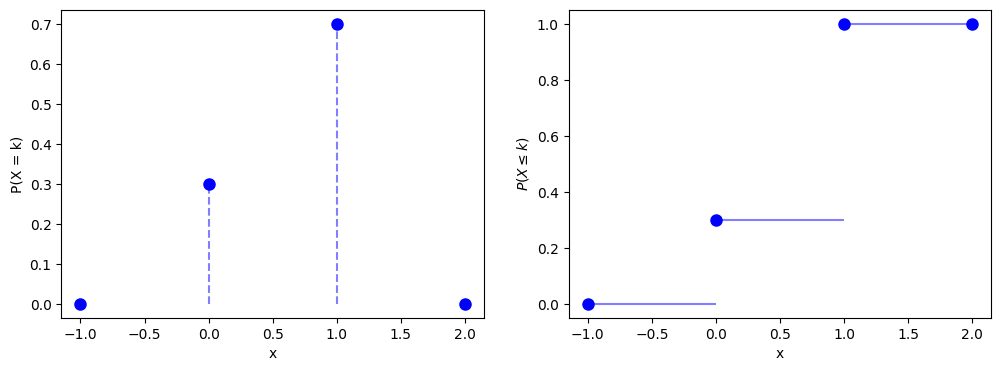

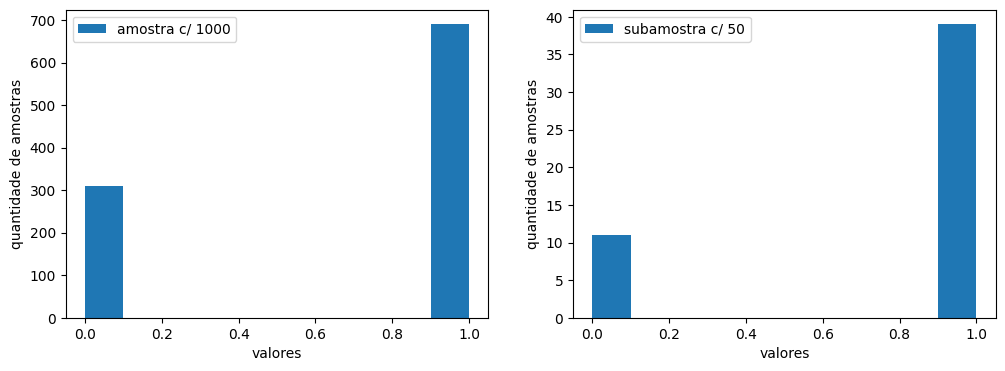

In [ ]:
#Faça um código para mostrar a PMF, a CDF e os histogramas
#de amostras geradas aleatoriamente
#Dica: você deve usar as funções que criamos para
#a distribuição uniforme discreta.

x = range(-1,3)
p = 0.7
f = st.bernoulli.pmf(x,p)
F = st.bernoulli.cdf(x,p)
plotDistribuicao(x,f,F)
dados = st.bernoulli.rvs(p,size=1000)
histograma(dados)

## Distribuição Binomial

**Contribuidores**
* 202006840003, Matheus Marins
* 202006840039, Matheus Pantoja

É a distribuição do número de sucessos numa sequência de $n$ tentativas, nas quais os únicos resultados possíveis são o sucesso (com probabilidade de ocorrência $p$) e o fracasso ($q=1-p$). A probabilidade de sucesso é a mesma para todos, sendo a quantidade de sucessos ($x$) em $n$ tentativas a variável de interesse.

* Média: $np$
* Variância: $np(1-p)$
* Distribuição de probabilidade: $P(X = k)=\frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}$
* Distribuição acumulada de probabilidade:
$P(X \leq k) = \sum_{i=0}^{k}\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$

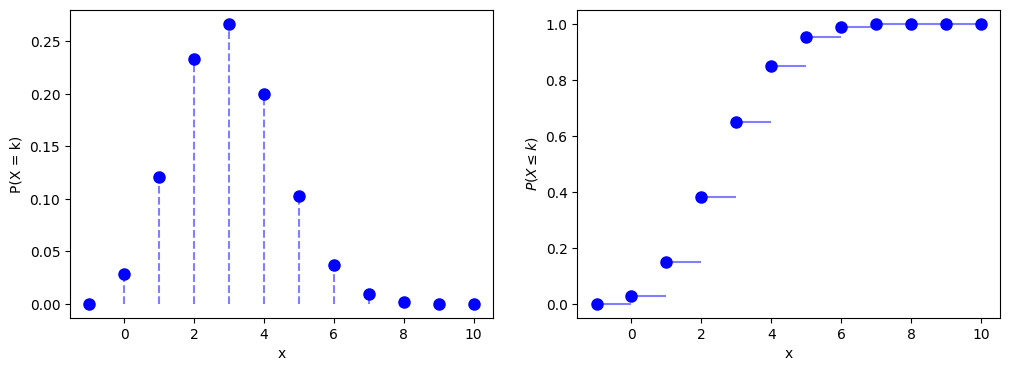

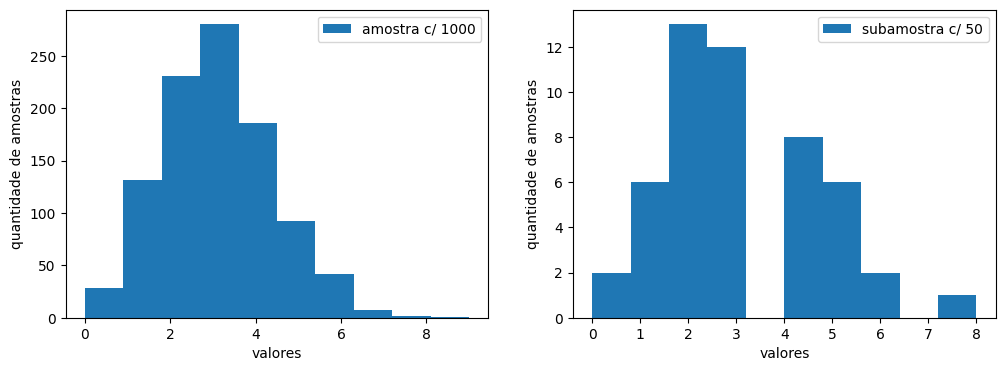

In [ ]:
#Faça um código para mostrar a PMF, a CDF e os histogramas
#de amostras geradas aleatoriamente
#Dica: você deve usar as funções que criamos para
#a distribuição uniforme discreta.

n = 10
p = 0.3
x = range(-1,n+1)
f = st.binom.pmf(x,n,p)
F = st.binom.cdf(x,n,p)
plotDistribuicao(x,f,F)
dados = st.binom.rvs(n,p,size=1000)
histograma(dados)

### Exemplo

**Contribuidores**
* Adan da Silva Rocha
* Gabriel Santos e Silva

Vamos supor que, em um lote, foram fabricadas 10 mil unidades de jaquetas jeans com foco na exportação. Para ser enviado para fora do país, o produto deve estar em condições perfeitas de uso e apresentar um padrão impecável em todas as unidades. Acontece que já é de conhecimento da gestão o fato de que a probabilidade de uma jaqueta chegar ao fim da linha de produção com defeito é de 5%. O limite do importador é de 30 jaquetas com defeito dentro do lote e você precisa calcular quais são as chances de isso acontecer.

**Resposta**: Seja $X$ a VA do número de peças defeituosas no lote. Esta VA segue uma distribuição binomial, pois temos o mesmo experimento de Bernoulli ($p=0.05$) executado várias vezes ($n=10000$).

Desejamos saber a probabilidade do lote ser considerado impróprio pelo importador que representamos por $P(X \leq 30)$. Assim temos,

$P(X \leq 30) = \sum_{i=0}^{k}\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i} = \sum_{i=0}^{k}\frac{10000!}{i!(n-i)!}(0.05)^i(0.95)^{n-i}$

Para este cálculo usaremos o código abaixo.

In [ ]:
import scipy.stats as st

n = 10000
p = 0.05
k = 30
p = st.binom.cdf(k,n,p)
print("A probabilidade é",p)

A probabilidade é 2.860130784791373e-174


Assim vemos que há uma probabilidade muito baixa de atender aos requisitos do importador.

## Distribuição Geométrica

**Contribuidores**
* 202006640007, Frank Bruno
* 202006840008, Caio Brasil

A distribuição geométrica fornece a probabilidade de que a primeira ocorrência de sucesso requeira $k$ tentativas independentes, cada uma com probabilidade de sucesso $p$. Em outras palavras ela mede a probabilidade de que a $k$-ésima tentativa (de $k$ tentativas) seja o primeiro sucesso.

* Média: $\frac{1}{p}$
* Variância: $\frac{1-p}{p^2}$
* Distribuição de probabilidade: $P(X=k)=(1-p)^{k-1}p$
* Distribuição acumulada de probabilidade:$P(X \leq k) = 1-(1-p)^{k}$

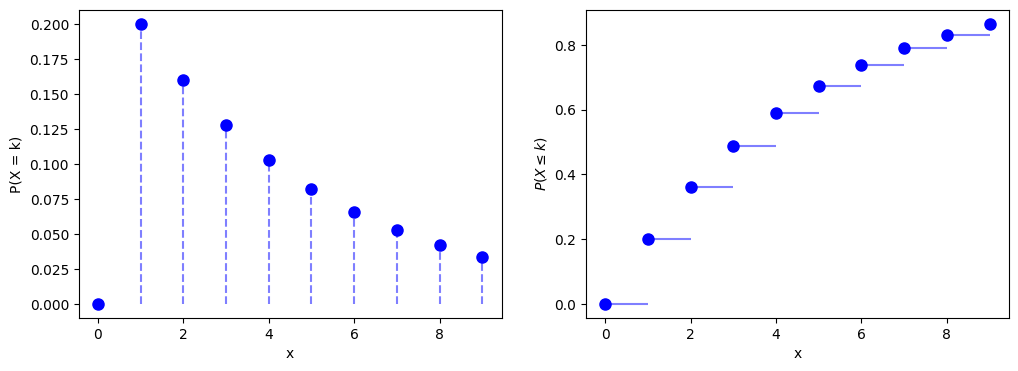

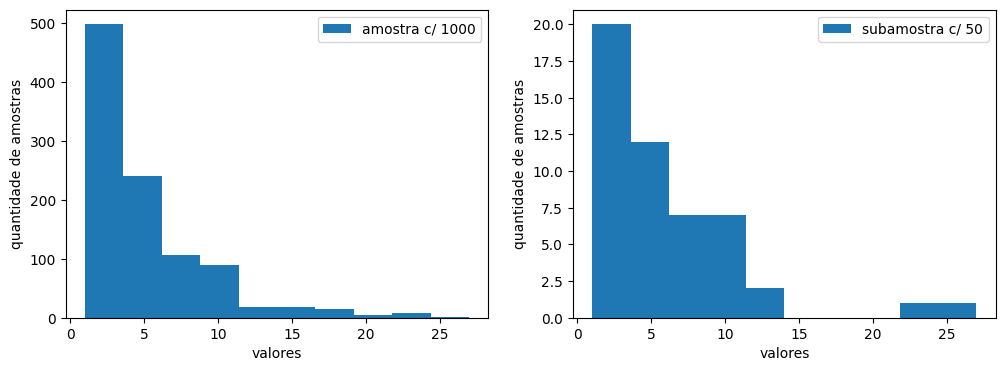

In [ ]:
#Faça um código para mostrar a PMF, a CDF e os histogramas
#de amostras geradas aleatoriamente
#Dica: você deve usar as funções que criamos para
#a distribuição uniforme discreta.
x = range(0,10)
p = 0.2
f = st.geom.pmf(x,p)
F = st.geom.cdf(x,p)
plotDistribuicao(x,f,F)
dados = st.geom.rvs(p, size=1000)
histograma(dados)

## Distribuição Poisson

**Contribuidores**
* 201906840032, Pedro

Expressa a probabilidade de uma série de eventos ocorrer num certo intervalo de tempo ou espaço, desde que eles ocorram de forma independente entre si. A média de ocorrência dos eventos é fixa e dada por $\lambda$.

* Média: $\lambda$
* Variância: $\lambda$
* Distribuição de probabilidade: $P(X=k) = \frac{λ^ke^{-λ}}{k!}$
* Distribuição acumulada de probabilidade: $P(X \leq k) = e^{-λ} \sum_{i=0}^{\lfloor k\rfloor}\frac{λ^i}{i!}$

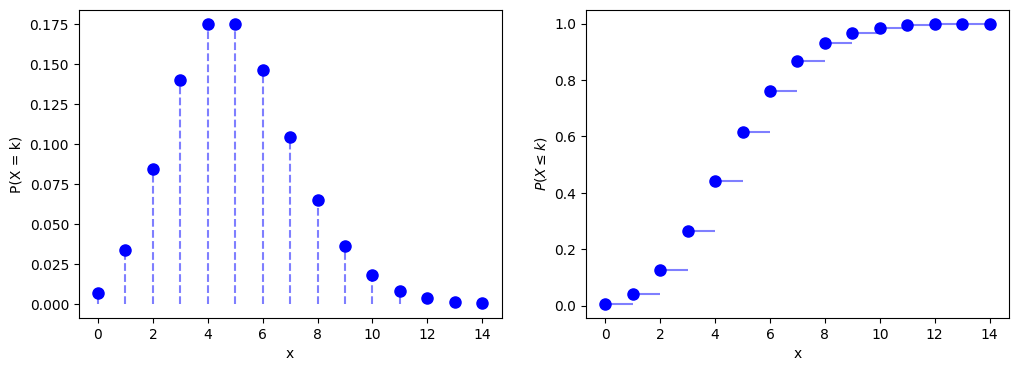

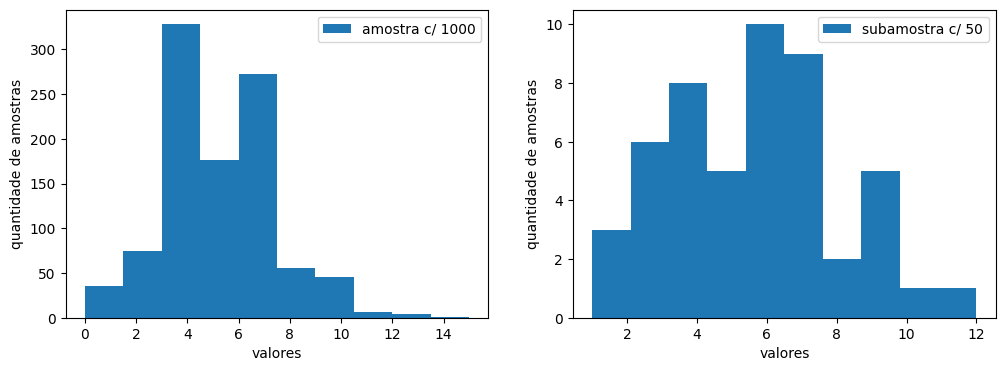

In [ ]:
#Faça um código para mostrar a PMF, a CDF e os histogramas
#de amostras geradas aleatoriamente
#Dica: você deve usar as funções que criamos para
#a distribuição uniforme discreta.

x = range(0,15)
lambd = 5
f = st.poisson.pmf(x,lambd)
F = st.poisson.cdf(x,lambd)
plotDistribuicao(x,f,F)
dados = st.poisson.rvs(lambd,size=1000)
histograma(dados)

#Distribuições contínuas

## Distribuição Uniforme contínua

Uma VA uniforme contínua pode assumir qualquer valor contínuo entre $[a,b]$, cada um com a mesma probabilidade. Contudo, por se tratar de uma distribuição contínua, valores pontuais têm probabilidade 0. A probabilidade de um intervalo é obtida integrando a função de densidade de probabilidade $f(x)$.

* Média: $\frac{b+a}{2}$
* Variância: $\frac{(b-a)^2}{12}$
* Distribuição de probabilidade: $f(x) = \begin{cases} \frac{1}{b-a} & a \leq x \leq b\\
0 & \text{outros casos}
\end{cases}$
* Distribuição acumulada de probabilidade: $F(x) =
\begin{cases}
0 & x \lt a \\
\frac{x-a}{b-a} & a \leq x \leq b\\
1 & x \gt b
\end{cases}$

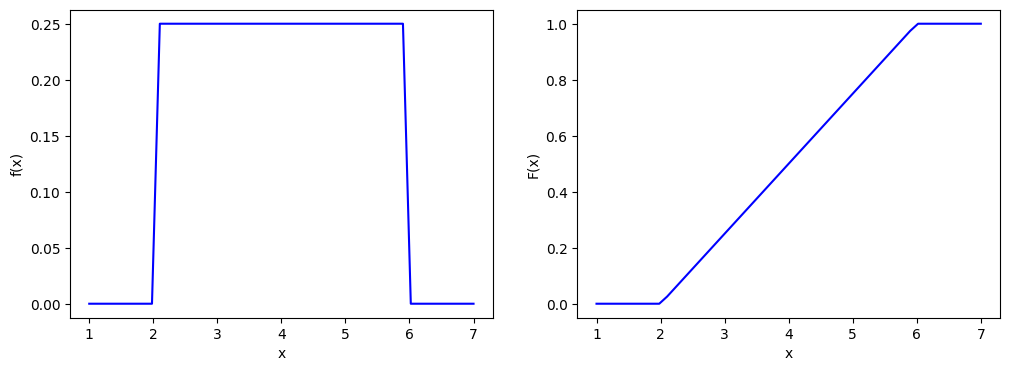

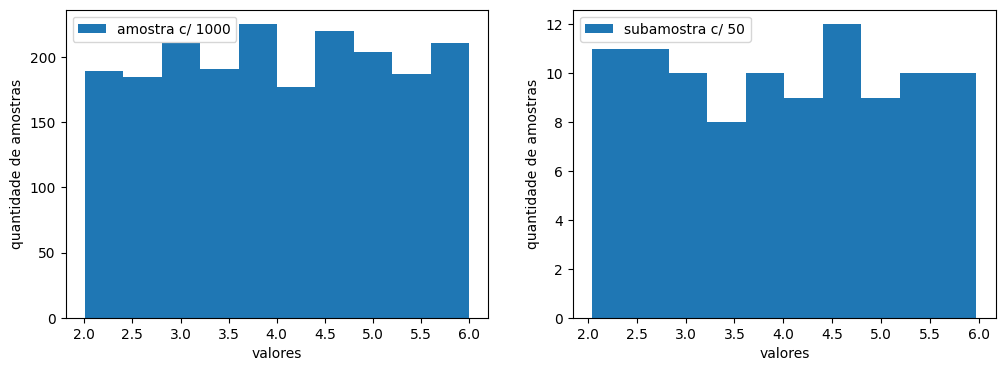

In [ ]:
import numpy as np
import scipy.stats as st
import random
import matplotlib.pyplot as plt

def plotDistribuicaoCont(x,fx,Fx):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.plot(x,f,'b',ms=8)
  plt.xlabel("x")
  plt.ylabel("f(x)")

  plt.subplot(1,2,2)
  plt.plot(x,F,'b',ms=8)
  plt.xlabel("x")
  plt.ylabel("F(x)")
  plt.show()

a = 2
b = 6
loc = a  #no scipy não passamos os parâmetros a e b, mas loc e scale
scale = b-a #no scipy não passamos os parâmetros a e b, mas loc e scale
x = np.linspace(a-1,b+1)
f = st.uniform.pdf(x,loc,scale)
F = st.uniform.cdf(x,loc,scale)
plotDistribuicaoCont(x,f,F)
dados = st.uniform.rvs(loc,scale,size=2000)
histograma(dados)

### Exemplo

**Contribuidores**
* Heitor Mesquita
* Richard Douglas

Alamario e Caio combinam de se encontrar entre 18 e 19 horas para jantar em um restaurante italiano. Assumindo que cada um deles pode chegar a qualquer momento no intervalo entre 18h e 19h (de forma equiprovável), calcule a probabilidade de que Alamario e Caio cheguem antes das 18:45.

**Exemplo**: Considere $X$ como a VA da hora de chegada de Caio e $Y$ como a VA da hora de chegada de Alamario e que ambas as VAs são uniformemente distribuídas no intervalo $[18,19]$. Então para $X$ temos que:

$f(x) = \begin{cases} 1 & 18 \leq x \leq 19\\
0 & \text{outros casos}
\end{cases}$

Desta distribuição, vemos que $P(X \leq 18.75) = \frac{3}{4}$, já que $\frac{1}{4}$ de hora (15 minutos) são $\frac{1}{4}$ deste intervalo. O mesmo acontece para $Y$. Assim, assumindo que $X$ e $Y$ são independentes, temos que a probabilidade de Caio e Alamario chegarem antes de 18:45 será igual a $P(X \leq 18.75,Y \leq 18.75) = P(X \leq 18.75)P(Y \leq 18.75) = \frac{3}{4} \times \frac{3}{4} = \frac{9}{16}$, já que as VAs são independentes.

## Distribuição Exponencial

**Contribuidores**
* 202006840007, Frank Bruno

A distribuição exponencial está ligada a de Poisson, ela analisa inversamente um experimento, calculando um intervalo de tempo ou espaço até a ocorrência de um evento. Possui apenas um parâmetro $\lambda \gt 0$, que é denominado de taxa.

* Média: $\frac{1}{\lambda}$
* Variância: $\frac{1}{\lambda^2}$
* Distribuição de probabilidade: $f(x) = \lambda e^{-\lambda x}$
* Distribuição acumulada de probabilidade: $ F(x) = 1-e^{-\lambda x}$


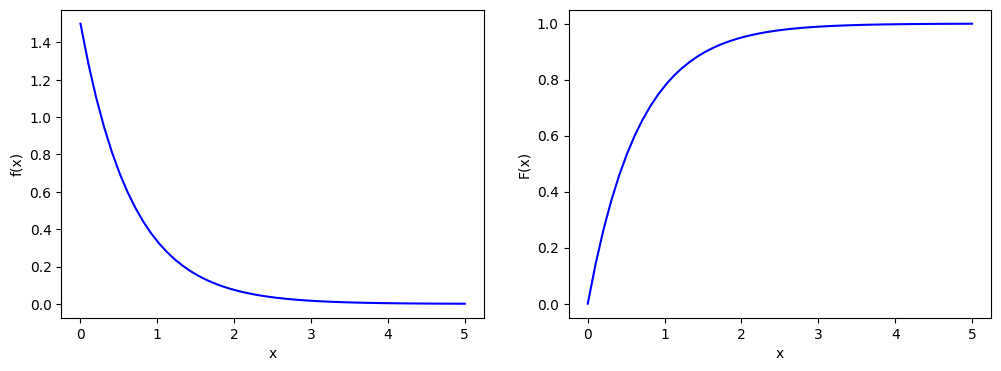

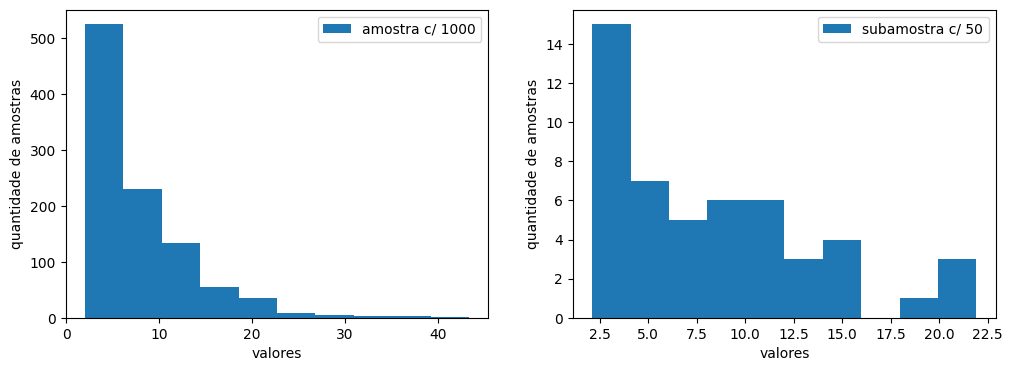

In [ ]:
#Faça um código para mostrar a PDF, a CDF e os histogramas
#de amostras geradas aleatoriamente
#Dica: você deve usar as funções que criamos anteriormente.

lambd = 1.5 #não usar a variavel lambda porque é palavra reservada em Python
x = np.linspace(0,5)
f = st.expon.pdf(x,scale=1/lambd)
F = st.expon.cdf(x,scale=1/lambd)
plotDistribuicaoCont(x,f,F)
dados = st.expon.rvs(a,b,size=1000)
histograma(dados)

### Exemplo

**Contribuidores**
* Flavio Rafael Trindade
* Gabriel Silva Ribeiro

Considere um sistema de computação em rede. As conexões dos usuários ao sistema podem ser modeladas por um Processo de Poisson. A média desse processo é de 25 conexões por hora:

1.   Qual a probabilidade de não haver conexões em um intervalo de 6 minutos?
2.   Qual a probabilidade do tempo até a próxima conexão estar entre 2 e 3 minutos?

**Resposta**: Seja $X$ o tempo em horas até a primeira conexão. $X$ tem distribuição exponencial com $\lambda = 25$ conexões por hora.

Em (1), queremos saber $P(X \geq 0.1)$, já que 6 minutos são 0.1 horas. Assim fazemos $P(X \geq 0.1) = 1 - F(0.1) = 1 - (1 - e^{-\lambda x}) = e^{-25 \times 0.1} = 0.082$.




In [ ]:
import scipy.stats as st

lambd = 25
p = 1 - st.expon.cdf(0.1,scale=1/lambd)
print("A probabilidade (1) é",p)

A probabilidade (1) é 0.08208499862389884


Em (2), queremos saber $P(0.033 \leq X \leq 0.05)$, já que 2 e 3 minutos são, respectivamente, 0,033 e 0,05 horas. Assim fazemos,

$P(0.033 \leq X \leq 0.05) = F(0.05) - F(0.033) = (1 - e^{-25 \times 0.05}) - (1 - e^{-25 \times 0.033}) = 0.152$

In [ ]:
import scipy.stats as st

lambd = 25
p = st.expon.cdf(0.05,scale=1/lambd) - st.expon.cdf(0.033,scale=1/lambd)
print("A probabilidade (2) é",p)

A probabilidade (1) é 0.15173019560475898


# Distribuição Normal

Muitos conjuntos de dados tem um formato de "sino" e a função de densidade de uma <u>distribuição normal</u> tem este formato. Esta distribuição é o modelo mais largamente utilizado para medidas contínuas. Esta distribuição é definida para o intervalo $(-\infty,\infty)$ e tem como parâmetros $\mu$ e $\sigma$.

A distribuição tem importante uso na estatística. Porque toda vez que um experimento aleatório é replicado, a VA formada pelo resultado médio (ou total) das réplicas <u>tenderá a ter uma distribuição normal</u>, à medida que o número de réplicas se torne grande. Este resultado, conhecido como o <u>teorema do limite central</u>, foi mostrado por De Moivre, pela primeira vez, em 1733. Gauss, independentemente, desenvolveu esta ideia cerca de 100 anos depois, por isso a distribuição normal é também referida como distribuição gaussiana.

* Média: $\mu$
* Variância: $\sigma^2$
* Distribuição de probabilidade: $f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$
* Distribuição acumulada de probabilidade: $F(x) = \frac{1}{2}[1+\text{erf}(\frac{x-\mu}{\sigma\sqrt{2}})]$
 * Onde $\text{erf}(z)$ é a [função de erro de Gauss](https://en.wikipedia.org/wiki/Error_function) dada por ${\text{erf}(z)={\frac {2}{\sqrt {\pi }}}\int _{0}^{z}e^{-t^{2}}\,dt}$

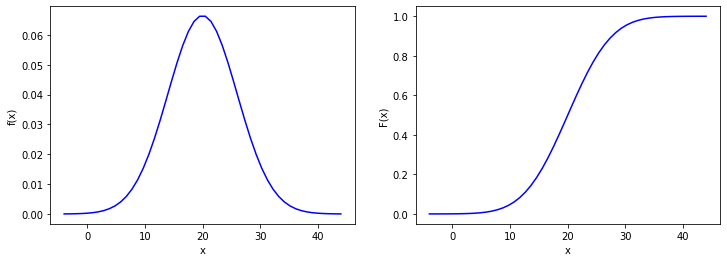

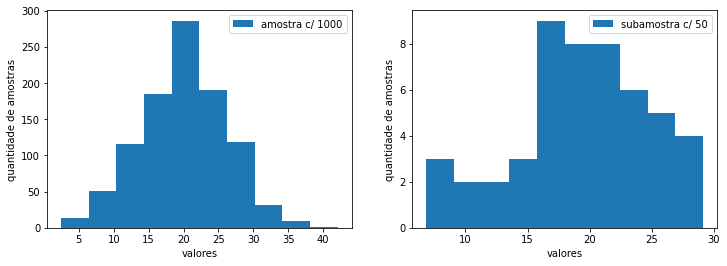

In [ ]:
mu = 20
sigma = 6
x = np.linspace(mu-4*sigma,mu+4*sigma)
f = st.norm.pdf(x,mu,sigma)
F = st.norm.cdf(x,mu,sigma)
plotDistribuicaoCont(x,f,F)
dados = st.norm.rvs(mu,sigma,size=1000)
histograma(dados)

##Impacto dos parâmetros

Qual o impacto da variação de $\sigma$ e $\mu$ no formato da distribuição?

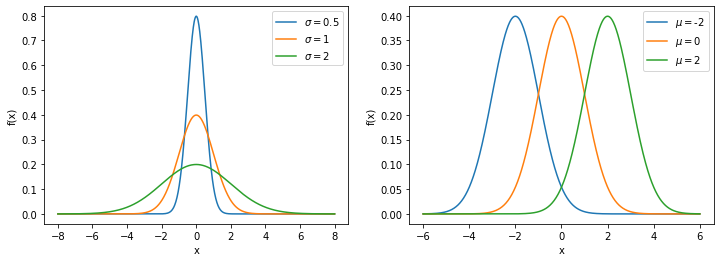

In [ ]:
mus = [-2, 0, 2]
sigmas = [0.5, 1, 2]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
mu = 0
x = np.linspace(mu-8,mu+8,1000) # 4*sigma = 4*2 = 8
for sigma in sigmas:
  f = st.norm.pdf(x,mu,sigma)
  plt.plot(x,f,ms=8,label="$\sigma =$"+str(sigma))

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

plt.subplot(1,2,2)
sigma = 1
x = np.linspace(-6,+6,1000) # 4*sigma = 4*1 = 4, mu = 0
for mu in mus:
  f = st.norm.pdf(x,mu,sigma)
  plt.plot(x,f,ms=8,label="$\mu =$"+str(mu))

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

plt.show()

## Normal padrão

Este é um caso específico da distribuição normal, quando $\mu=0$ e $\sigma=1$. Observe que no caso $\sigma^2 = 1$. Este caso da distribuição normal tem vários usos na estatística. Em certos testes de hipótese, por exemplo, usamos a distribuição normal padrão para conferir a significância estatística destes. A distribuição normal padrão é referida por $Z$. A notação $Z \sim \mathcal{N}(0,1)$, significa que $Z$ se distribui como uma normal com $\mu = 0$ e $\sigma=1$.

### Exemplo (Corrente elétrica)

Suponha que as medidas de corrente elétrica em um fio sigam a distribuição normal, com média de 10 mA e variância de 4 mA². Qual é a probabilidade de a medida exceder 13 mA?

**Solução**: Seja $X$ a VA da corrente elétrica no referido fio. Sabemos que $X \sim \mathcal{N}(10,2)$. Nós queremos calcular $P(X \gt 13)$, a figura abaixo mostra a área que desejamos calcular

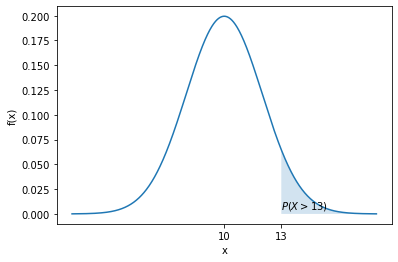

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

mu = 10
sigma = 2
x = np.linspace(mu-4*sigma,mu+4*sigma,1000)
f = st.norm.pdf(x,mu,sigma)
plt.plot(x,f)

area = np.linspace(13,mu+4*sigma, 100)
plt.fill_between(area,st.norm.pdf(area,mu,sigma),alpha=0.2)
plt.text(13,0.005,"$P(X > 13)$")

plt.xlabel("x")
plt.xticks([10,13])
plt.ylabel("f(x)")
plt.show()

Infelizmente, não há uma expressão exata para a integral de uma função densidade de probabilidade normal, sendo esta área tipicamente encontradas de forma numérica.

Podemos calcular a probabilidade desejada de três formas:

1. Opção engenheiro que se perdeu na selva e só tem um livro de probabilidade à mão
2. Opção engenheiro que gosta de fazer as coisas na unha
3. Opção engenheiro que sabe o mínimo de Python e de probabilidade

\# Opção 1: engenheiro que se perdeu na selva e só tem um livro de probabilidade à mão

**Resumo**: Para computar esta probabilidade, o engenheiro vai converter $X$ em uma distribuição normal padrão ($Z$) e calcular a probabilidade desejada por meio de uma <u>tabela normal</u>. **FIM**

Sabemos que $P(X \gt 13) = 1 - P(X \leq 13)$. Contudo precisamos transformar $X$ em $Z$, para tanto basta normalizar $X$, fazendo $\frac{X-\mu}{\sigma}\Rightarrow \frac{X-10}{2} \sim Z$, assim temos

$P(X \gt 13) = 1 - P(X \leq 13)\\
P(\frac{X-10}{2} \gt \frac{13-10}{2}) = 1 - P(\frac{X-10}{2} \leq \frac{13-10}{2}) \\
P(Z \gt 1.5) = 1 - P(Z \leq 1.5)$

A tabela normal mostra $P(Z \leq z)$. Assim, o trabalho do engenheiro é procurar o valor de $z$ (chamado *z-score* ou valor-z) na tabela. Veja aqui um [exemplo de tabela normal](https://drive.google.com/file/d/1DcH8gxi1CUuAcrE6x4pSknfW1kcy_90Z/view?usp=sharing). As linhas indicam o valor de $z$ até a primeira casa decimal e as colunas o valor da segunda casa decimal de $z$.

Abaixo reproduzimos um trecho da tabela normal (as probabilidades são $P(Z \leq z)$).

$z$ | ,00 | ,01 | ,02 | $\ldots$ |
----|-----|-----|-----|----------|
0   |0,5000| 0,5040| 0,5080| $\ldots$|
 | | $\ldots$ | | |
1,5 |0,9332| 0,9345| 0,9357| $\ldots$|
| | $\ldots$ | | |

Portanto, pela tabela, sabemos que $P(Z \leq 1.50) = 0.9332$. Assim, $P(X \gt 13) = 1 - P(Z \leq 1.50) = 1 - 0.9332 = 0.0668$.





In [ ]:
#Opção 2: engenheiro que gosta de fazer as coisas na unha
#Neste caso o engenheiro vai integrar a função de densidade da Normal
#numericamente sem usar os pacotes estatísticos

import math
import numpy as np

def f_(x,mu,sigma):
  return (1/(sigma*math.sqrt(2*math.pi)))*(math.exp((-1/2)*(((x-mu)/sigma)**2)))

mu, sigma = 10, 2

x = np.linspace(13,mu+sigma*4)
f = np.vectorize(f_)

y = f(x,mu,sigma)

area=np.trapz(y,x)
print(area)

0.06681755845583726


In [ ]:
#Opção 3: engenheiro que sabe o mínimo de Python e de probabilidade
#Sabemos que P(X > 13) = 1 - P(X <= 13) = 1 - F(x)

import scipy.stats as st

mu, sigma = 10, 2
prob_maior_13 = 1 - st.norm.cdf(13,mu,sigma)
print(prob_maior_13)

0.06680720126885809


### Exemplo (Luzes de freio -1)

O tempo que o motorista leva para reagir às luzes de freio em um veículo em desaceleração é crucial para evitar colisões traseiras. O artigo [Fast-Rise Brake Lamp as a Collision-Prevention Device](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/1001/58720.0001.001.pdf?sequence=2) sugere que o tempo de reação de uma resposta no trânsito a um sinal de frenagem com luzes convencionais pode ser modelado com uma distribuição normal de média 1,25 segundo e desvio padrão 0,46 segundo. Qual a probabilidade de que o tempo de reação esteja entre 1,00 e 1,75 segundo?

**Solução**: Seja $X$ a VA do tempo de reação, com $\mu=1.25$ e $\sigma=0.46$. Queremos determinar $P( 1.00 \leq X \leq 1.75)$.

Observando as curvas de densidade nas figuras abaixo, determinamos que a área que queremos calcular é dada por $P( 1.00 \leq X \leq 1.75) = P(X \leq 1.75) - P(X \leq 1.00)$. O primeiro termo equivale a área verde no gráfico da esquerda e o segundo termo da diferença equivale à área vermelha no gráfico central. Por fim, o gráfico da direita mostra a área da diferença em verde.

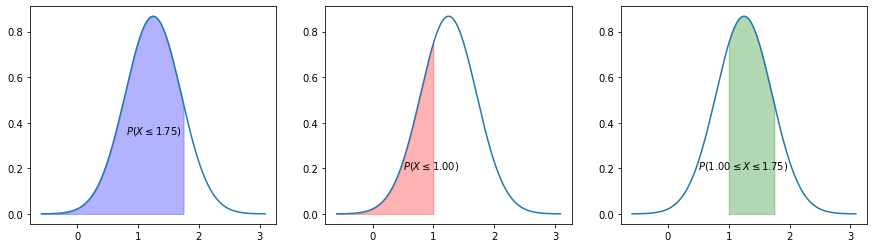

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
mu = 1.25
sigma = 0.46
x = np.linspace(mu-4*sigma,mu+4*sigma,1000)
f = st.norm.pdf(x,mu,sigma)
plt.plot(x,f)
area = np.linspace(mu-4*sigma,1.75, 100)
plt.fill_between(area,st.norm.pdf(area,mu,sigma),color="b",alpha=0.3)
plt.text(0.8,0.35,"$P(X \leq 1.75)$")

plt.subplot(1,3,2)
plt.plot(x,f)
area = np.linspace(mu-4*sigma,1.00, 100)
plt.fill_between(area,st.norm.pdf(area,mu,sigma),color="r",alpha=0.3)
plt.text(0.5,0.2,"$P(X \leq 1.00)$")

plt.subplot(1,3,3)
plt.plot(x,f)
area = np.linspace(1.00,1.75, 100)
plt.fill_between(area,st.norm.pdf(area,mu,sigma),color="g",alpha=0.3)
plt.text(0.5,0.2,"$P(1.00 \leq X \leq 1.75)$")

plt.show()

Sabemos também que as áreas que queremos podem ser calculadas pela distribuição acumulada, assim temos que $ P( 1.00 \leq X \leq 1.75) = F(1.75) - F(1.00)$. Assim, podemos calcular a área numericamente por meio de código como abaixo.

**Nota**: também poderíamos usar o método do engenheiro da selva e a) padronizar os valores 1.75 e 1.00 (converter para a normal padrão); b) procurar os respectivos valores de probabilidade na tabela da normal padrão; c) subtraí-los.

In [ ]:
import scipy.stats as st

mu, sigma = 1.25, 0.46
prob_entre_b_a = st.norm.cdf(1.75,mu,sigma) - st.norm.cdf(1.00,mu,sigma)
print(prob_entre_b_a)

0.5680717101573987


### Exemplo (Luzes de freio - 2)

Considerando os dados do exemplo anterior, calcule o tempo de reação de modo que apenas 1% dos tempos de reação sejam maiores do que ele.

**Solução**: Seja $x$ o tempo de reação desejado na questão, neste caso queremos determinar $x$ de modo a que $P(X \gt x) = 0.01$.

Observe que a equação acima é equivalente à $1 - P(X \leq x) = 0.01 \Rightarrow P(X \leq x) = 0.99$. Neste caso, queremos fazer o inverso da questão anterior, que é determinar $x$ dado o valor da área.

Pelo método do engenheiro na selva, podemos usar a tabela para determinar o valor de $x$. Basta para isso, procurar o valor na tabela que mais se aproxima da probabilidade que queremos.

Abaixo reproduzimos um trecho da tabela normal.

$z$ | ,00 | ,01 | ,02 | ,03 | $\ldots$ |
----|-----|-----|-----|-----|----------|
0   |0,5000| 0,5040| 0,5080| 0,5120| $\ldots$|
 | | $\ldots$ | | |
2,3 |0,9893|0,9896|0,9898|0,9901| $\ldots$|
| | $\ldots$ | | |

Assim vemos que o valor $z = 2.33$. Contudo, para determinar o valor de $x$, precisamos fazer a padronização ao inverso: $x = \mu + z\sigma = 1.25 + 2.33 \times 0.46 = 2.3218$.

Assim sabemos que 1\% dos tempos de reação são maiores do que 2.32 segundos.

In [ ]:
#Também podemos responder usando python
#Neste caso, vamos usar a função ppf, que calcula os
#percentis de uma distribuição
import scipy.stats as st

mu, sigma = 1.25, 0.46
x_maior_1_porcento = st.norm.ppf(0.99,mu,sigma)
print(x_maior_1_porcento)

2.320120022058787


## Comportamento de dados normais

Uma propriedade de uma VA normal é que ela tende a assumir valores que são bem próximos da média. Podemos usar a seguinte <u>regra empírica</u>, para qualquer que sejam $\mu$ e $\sigma$:

* Aproximadamente 68% dos valores estão a 1 desvio padrão da média
* Aproximadamente 95% dos valores estão a 2 desvios padrão da média
* Aproximadamente 99.7% dos valores estão a 3 desvios padrão da média

#### Exemplo (diodo)

Suponha que a tensão de ruptura de diodos siga uma distribuição normal. Qual é a probabilidade de que a tensão de ruptura de um diodo escolhido aleatoriamente esteja a 1 desvio padrão da média?

**Solução**: Usando a <u>regra empírica</u> acima, sabemos que, independente de $\mu$ e $\sigma$ (que desconhecemos no problema), a probabilidade de que a tensão de ruptura esteja a 1 desvio padrão da média é de aproximadamente 0.68.

No entanto podemos calcular este valor, assumindo que $X$ representa a tensão de ruptura e usando a normal padrão. No caso, como $\mu=0$ e $\sigma=1$, precisamos calcular $P(-1 \leq X \leq 1) = F(1) - F(-1)$.

In [ ]:
import scipy.stats as st

mu, sigma = 0.0, 1.0
prob_entre_b_a = st.norm.cdf(1.00,mu,sigma) - st.norm.cdf(-1.00,mu,sigma)
print(prob_entre_b_a)

0.6826894921370859


##Exemplo (Usain Bolt)

Usain Bolt é, atualmente, o homem mais rápido do mundo e Yohan Blake é o segundo. Com base no histórico das últimas 30 corridas (pode ser obtido no site https://worldathletics.org/), vemos que **Bolt corre os 100 m rasos em média em 9,9609 segundos com um desvio-padrão de 0,0993** segundos; enquanto que **Blake corre a mesma prova em média em 10,0569 segundos com desvio padrão de 0,0859 segundos**.

Supondo que os tempos na corrida dos 100 m rasos de Bolt e Blake são independentes e normalmente distribuídos, calcule  a probabilidade de Yohan Blake ganhar de Usain Bolt?

:**Solução**:

$X \sim \mathcal{N}(9.9609, 0.0993)$ = é a VA do tempo do Usain Bolt

$Y \sim \mathcal{N}(10.0569, 0.0859)$ = é a VA do tempo do Yohan Blake

$D = X - Y \Rightarrow$ é VA da diferença de tempo entre Usain Bolt e Yohan Blake. Se $D \gt 0$, então Blake ganhou. Então deve-se calcular $P(D>0) = 1 - F(0)$.

Mas qual a distribuição de $D$?

É uma distribuição normal, mas para VAs $X$ e $Y$ de quaisquer distribuições $E(X \pm Y) = E(X) \pm E(Y)$ e para VAs $X$ e $Y$ de qualquer distribuições e independentes $Var(X \pm Y) = Var(X) + Var(Y)$.

Logo,

$D \sim N(9.9609-10.0569,\sqrt{0.0993^2 + 0.0859^2})$

In [ ]:
import math
import scipy.stats as st

(mu_U,sigma_U) = (9.9609,0.0993)
(mu_Y,sigma_Y) = (10.0569, 0.0859)

mu_D = mu_U - mu_Y
sigma_D = math.sqrt(sigma_U**2 + sigma_Y**2)

print(mu_D,sigma_D)
prob = 1 - st.norm.cdf(0,mu_D,sigma_D)
print(prob)

-0.09600000000000009 0.13129851484308572
0.2323412312299622


# Teorema do Limite Central

Este é um resultado fundamental na probabilidade e é por causa dele que a distribuição normal é tão importante.

Este teorema indica que quando fazemos <u>amostras de médias, somas e probabilidades</u>, a distribuição destas médias, somas e probabilidades tende a seguir uma distribuição normal, conforme o tamanho da amostra cresce.

Por esta razão, praticamente qualquer experimento onde você faça uma simulação e então extraia médias amostrais, somas ou probabilidades, deve lhe dar uma amostra aproximadamente normal, mesmo que a distribuição da população de onde foram extraídas as amostras de onde foram geradas as médias, somas e probabilidades não sigam esta distribuição.

Assim, isso significa que nós veremos distribuições normais muito frequentemente na prática.



## Funciona para soma de VAs

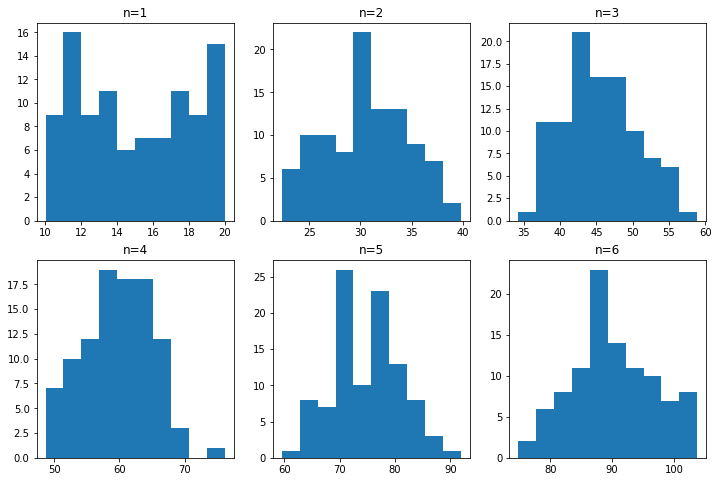

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt

#Suponha uma distribuição uniforme contínua entre (10,20)
#Ao somarmos duas amostras desta variável, teremos uma nova variável
#que pode assumir valores no intervalo (20,40), onde a chance de
#ocorrer valores mais próximos da média (30) é maior. Conforme
#aumentamos o número de amostras, a tendência à normal fica mais clara.

plt.figure(figsize=(12,8))
U = st.uniform.rvs(10,10,size=100)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.hist(U)
  plt.title("n="+str(i+1))
  U = U + st.uniform.rvs(10,10,size=100)

plt.show()

## Funciona para médias de VAs

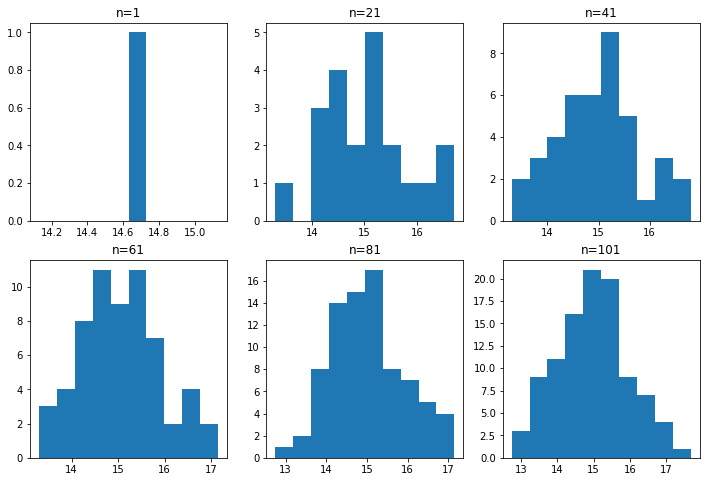

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

#Suponha uma distribuição uniforme contínua entre (10,20)
#Ao fazermos a média de várias amostras desta variável, teremos uma
#nova VA. A distribuição desta VA tende à distribuição normal, com
#média em torno de 15. Conforme aumentamos o número de amostras,
#a tendência à normal fica mais clara.

plt.figure(figsize=(12,8))
j = 1
medias = []
for i in range(120):
  U = st.uniform.rvs(10,10,size=10)
  medias.append(np.average(U))
  if (i % 20 == 0):
    plt.subplot(2,3,j)
    plt.hist(medias)
    j += 1
    plt.title("n="+str(i+1))

plt.show()

## Funciona para probabilidades

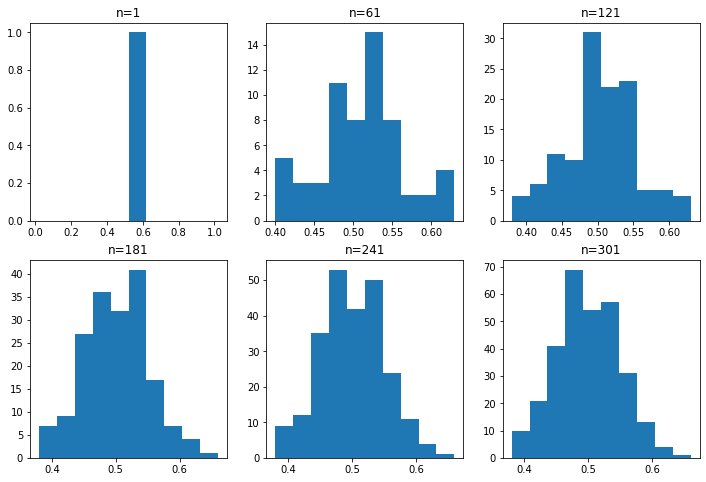

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

#Suponha uma distribuição uniforme contínua entre (10,20)
#Ao fazermos a estimativa de P(U<15) de várias amostras desta variável,
#teremos uma nova VA. A distribuição desta VA tende à distribuição normal,
#com média em torno de 0.5

plt.figure(figsize=(12,8))
j = 1
probs = []
for i in range(360):
  U = st.uniform.rvs(10,10,size=100)
  probs.append((U < 15).sum()/100)
  if (i % 60 == 0):
    plt.subplot(2,3,j)
    plt.hist(probs)
    j += 1
    plt.title("n="+str(i+1))

plt.show()

## Funciona para distribuições discretas também?

### Distribuição Uniforme discreta

Sim, também se aplica à distribuições discretas. Isso pode ser visto no caso de uma distribuição uniforme discreta.

Considere um dado justo, cuja distribuição de probabilidade associada a cada resultado possível $P(X=x) = \frac{1}{6}$, para qualquer $x \in \{1,2,3,4,5,6\}$.

Se fizermos a soma de duas destas VAs $Y = X + X$, teremos que $Y$ pode assumir os valores $\{2,3,4,5,6,7,8,9,10,11,12\}$ e que o valor 7 tem a maior probabilidade de ocorrência, enquanto valores como 2 e 12 são mais raros.

Seguindo este processo e fazendo a soma de novas VAs uniforme (ou seja jogando mais dados) observamos que a distribuição assume a forma de sino, característica da distribuição normal, ainda que os valores sejam discretos.

Neste caso a distribuição normal se torna uma boa aproximação para esta distribuição.



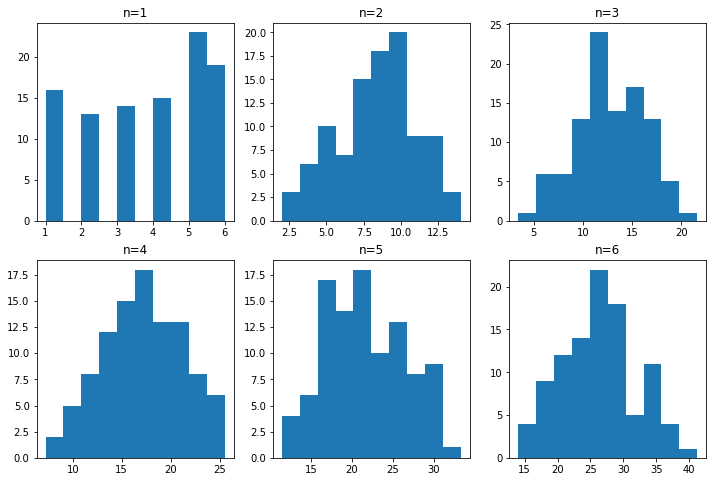

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt

#Suponha uma distribuição uniforme discreta entre (1,6)
#Ao somarmos duas amostras desta variável, teremos uma nova variável
#que pode assumir valores no intervalo (2,12), onde a chance de
#ocorrer valores mais próximos da média (7) é maior. Conforme
#aumentamos o número de amostras, a tendência à normal fica mais clara.

plt.figure(figsize=(12,8))
U = st.randint.rvs(1,7,size=100)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.hist(U)
  plt.title("n="+str(i+1))
  U = U + st.uniform.rvs(1,7,size=100)

plt.show()

### Aproximação da binomial

Observe que uma distribuição binomial $X \sim B(n,p)$ é, na realidade, a <u>soma</u> de $n$ VAs Bernoulli com probabilidade $p$. Formalmente dizemos $X \sim Bernoulli(p) + Bernoulli(p) + Bernoulli(p) + \ldots + Bernoulli(p)$. Quando $n$ é grande esta distribuição tende à uma distribuição normal, conforme o TLC.

Observe que, por conta deste resultado, a distribuição normal pode ser usada para aproximar o resultado de uma distribuição binomial quando a computação dos fatoriais não for viável (em casos onde o $N$ é muito grande, por exemplo).

Esta **aproximação é boa** quando $np \gt 5$ e $n(1 - p) \gt 5$ e pode ser feita **normalizando a VA binomial**, da seguinte forma $Z = \frac{X-np}{\sqrt{np(1-p)}}$ e computando a probabilidade desejada sobre $Z$.

#### Exemplo (bits transmitidos)
Em um canal de comunicação, suponha que o número de bits recebidos com erro é uma VA binomial, com $p = 1 \times 10^{-5}$. Se 2 MBytes forem transmitidos, qual a probabilidade de haver 150 ou menos erros?

**Solução**: Seja $X$ a variável que represente o número de bits com erro. A transmissão de 2 MB equivale a 16.777.216 de bits. Assim, a probabilidade de termos 150 bits com erro ou menos é dada por

$P(X \leq 150) = \sum_{i=0}^{150} {16.777.216\choose i} (0.00001)^{i}(0.99999)^{16.777.216-i}$

Observe que temos que calcular diversas vezes o binômio com valores realmente grandes.

np é 167.77216 e n(1-p) é 16777048.22784
Probabilidade calculada com a binomial: 0.08942571798772553
Probabilidade calculada com a normal: 0.08501779030271006


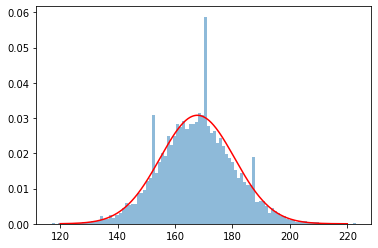

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

mb = 2
p = 0.00001
x = 150
n = mb *1024 *1024*8

print("np é "+str(n*p)+" e n(1-p) é "+str(n*(1-p)))

prob_menos_150 = st.binom.cdf(x,n,p)
print("Probabilidade calculada com a binomial: "+ str(prob_menos_150))

mu = n*p
sigma2 = n*p*(1-p)
sigma = np.sqrt(sigma2)
z = ((x)-mu)/sigma
prob = st.norm.cdf(z)
print("Probabilidade calculada com a normal: "+str(prob))

#Graficamente
dados_binom=st.binom.rvs(n,p,size=10000)

x = np.linspace(120,220,1000)

plt.hist(dados_binom,100,alpha=0.5,density=True)
plt.plot(x,st.norm.pdf(x,mu,sigma),'r')
plt.show()

#Outras distribuições de probabilidade

##Discretas

### Distribuição Multinomial

Na distribuição multinomial nós temos um experimento com $k$ resultados mutuamente exclusivos (apenas um deles pode ocorrer a cada execução do experimento) com probabilidades $p_1,\ldots, p_k$ e $n$ execuções independentes. Por serem mutuamente exclusivos, temos que $\sum_{i=0}^{k} p_i = 1$.

A distribuição multinomial é definida sobre um vetor aleatório $X = (X_1,\ldots,X_k)$, assim para $n$ execuções, temos que $\sum_{i=1}^{k}x_i = n$.

É uma generalização da distribuição binomial, quando temos múltiplas categorias de resultados. Assim, a distribuição multinomial dá a probabilidade de uma combinação de sucessos de cada categoria. Quando $k=2$ e $n=1$, temos uma distribuição de Bernoulli. Quando $k=2$ e $n \gt 1$ temos uma distribuição binomial.


* Média: $E(X_i) = np_i$ (observe que temos a média e a variância de cada $X_i$)
* Variância: $Var(X_i) = np_i(1-p_i)$
* Distribuição de probabilidade: $P(X_1 = x_1; \ldots; X_k = x_k) = \frac{n!}{x_1!\ldots x_n!}p_1^{x_1} \ldots p_k^{x_k}$ (observe que temos uma variável $k$ dimensional)
* Distribuição acumulada de probabilidade: Esta função é mais complicada para generalizar, porque podemos aculumar de formas diferentes em cada categoria. Exemplo: para $n=10$ e três categorias, se definirmos que vamos fazer $X_1 \leq 3$, podemos fazer múltiplas combinações de $X_2$ e $X_3$.

0.05670000000000023


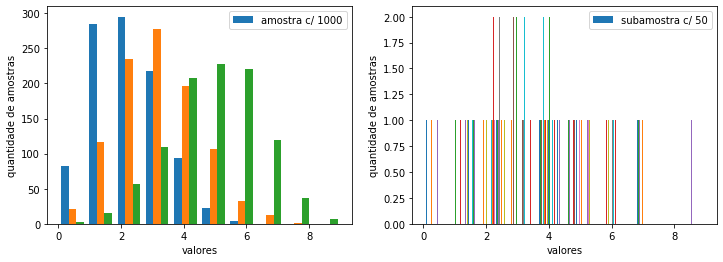

In [ ]:
n = 10
p_i = [0.2, 0.3, 0.5] #lista com as probabilidades de cada categoria

x = [3,2,5] #lista para o valor de x em cada uma das dimensões, deve somar 10
print(st.multinomial.pmf(x,n,p_i))

dados = st.multinomial.rvs(n,p_i,size=1000)
histograma(dados) #cada categoria é uma cor

### Distribuição Hipergeométrica

**Contribuidores**
* 202006840018, Heitor

A distribuição hipergeométrica é uma distribuição de probabilidade discreta que descreve a probabilidade de $k$ sucessos em $n$ retiradas, sem reposição, de uma população de tamanho $N$ que contém exatamente $K$ sucessos, sendo cada retirada um sucesso ou um fracasso. Em contraste, a distribuição binomial descreve a probabilidade de $k$ sucessos em $n$ retiradas com reposição.

* Média:  $n\frac{K}{N}$
* Variância: $n\frac{K}{N}\frac{N-K}{N}\frac{N-n}{N-1}$
* Distribuição de probabilidade: $P(X=k) = \frac{ \binom{K}{k} \binom{N-K}{n-k} }{\binom{N}{n}}$
* Distribuição acumulada de probabilidade: $P (X \leq k) = \sum_{i=0}^{k} \frac{ \binom{K}{i} \binom{N-K}{n-i} }{\binom{N}{n}}$

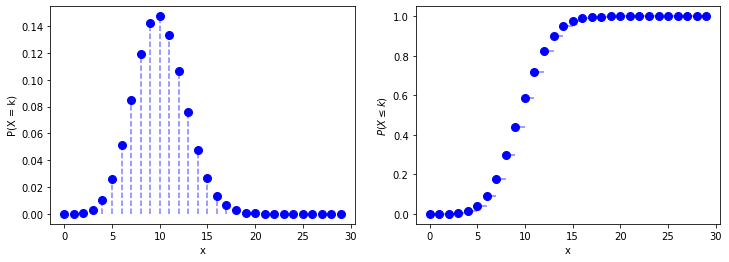

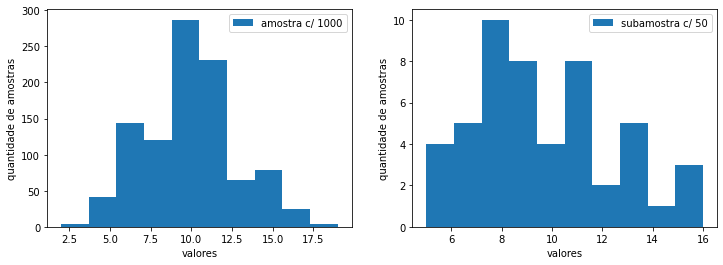

In [ ]:
#Faça um código para mostrar a PMF, a CDF e os histogramas
#de amostras geradas aleatoriamente
#Dica: você deve usar as funções que criamos para
#a distribuição uniforme discreta.

[N, n, K] = [500, 100, 50]
x = range(0,30)
f = st.hypergeom.pmf(x,N,n,K)
F = st.hypergeom.cdf(x,N,n,K)
plotDistribuicao(x,f,F)
dados = st.hypergeom.rvs(N,n,K, size=1000)
histograma(dados)

#### Exemplo

**Contribuidores**
* Ivan Neves

Suponha que há dez carros disponíveis para você fazer um *test drive*, e que cinco dos carros têm motores turbo. Se você testar três destes carros, qual é a probabilidade de que dois dos três carros que você dirige tenham motores turbo?

**Resposta**: Neste caso podemos dizer que $X$ é uma distribuição hipergeométrica, em que a população é $N=10$ carros, com $K=5$ sucessos (carros com motores turbo) na população e de onde retiraremos $n=3$ carros aleatoriamente e sem reposição (esta suposição é razoável, dado que não é comum fazer test drive do mesmo veículo duas vezes). Assim, desejamos

$P(X = 2) = \frac{ \binom{5}{2} \binom{5}{1} }{\binom{10}{3}} = \frac{10 \times 5}{120} = 0.4167$

In [ ]:
import scipy.stats as st

N=10
K=5
n=3
k=2
p = st.hypergeom.pmf(k,N,n,K)
print("A probabilidade é", p)

A probabilidade é 0.4166666666666665


##Contínuas

### Distribuição Gama

**Contribuidores**
* 202006840006 - Elian Ramon
* 201906840030 - Mercedes Diniz

É uma família de distribuições contínuas de probabilidade de dois parâmetros, usada para modelar valores de dados positivos que são assimétricos à direita e maiores que $0$.

Existem diferentes parametrizações no uso comum:
1. Com um parâmetro de forma $k$ e um parâmetro de escala $\theta$
2. Com um parâmetro de forma $\alpha = k$ e um parâmetro de escala inversa $\beta = \frac{1}{\theta}$, chamado parâmetro de taxa.
3. Com um parâmetro de forma $k$ e um parâmetro média $\mu = \frac{k}{\beta}$.

Em cada uma dessas formas, ambos os parâmetros são números reais positivos. A seguir apresentamos medidas e equações considerando a primeira formulação.

* Média: $k\theta$
* Variância: $k\theta^2$
* Distribuição de probabilidade: $f(x) = \frac{1}{\Gamma (k)\theta ^{k}}x^{k-1}e^{-\frac {x}{\theta }}$, onde ${\Gamma (z)=\int _{0}^{\infty }t^{z-1}e^{-t}\,dt}$
* Distribuição acumulada de probabilidade: $F(x)={\frac {1}{\Gamma (k)}}\gamma \left(k,{\frac {x}{\theta }}\right)$, onde  $ \gamma(k,x) = \int_0^x t^{k-1}\,e^{-t}dt$



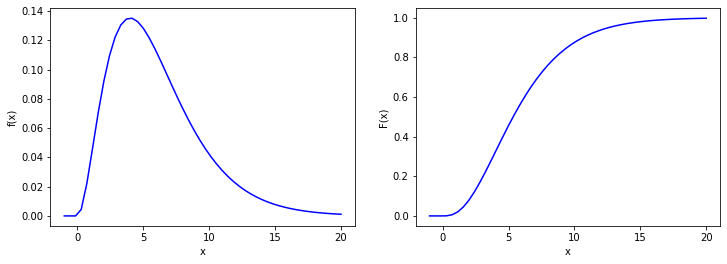

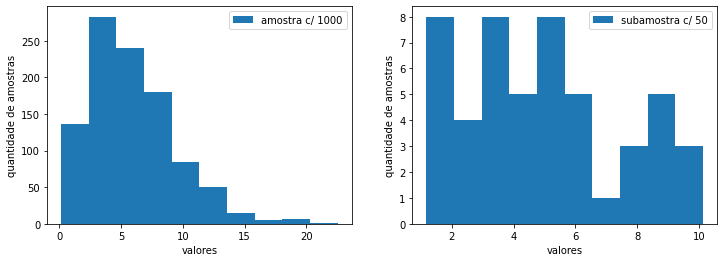

In [ ]:
#Faça um código para mostrar a PDF, a CDF e os histogramas
#de amostras geradas aleatoriamente
#Dica: você deve usar as funções que criamos anteriormente.

k = 3
theta = 2
x = np.linspace(-1,20)
f = st.gamma.pdf(x,k,scale=theta)
F = st.gamma.cdf(x,k,scale=theta)
plotDistribuicaoCont(x,f,F)
dados = st.gamma.rvs(k,scale=theta,size=1000)
histograma(dados)

### Distribuição Beta

---



**Contribuidores**
* 201906840032, Pedro Rendeiro

É uma família de distribuições limitadas entre $[0,1]$ e, portanto, muito utilizada para modelar o comportamento de variáveis aleatórias limitadas a um intervalo finito. Seus parâmetros são $\alpha \gt 0$ e $\beta \gt 0$, os quais modificam a forma da distribuição.

* Média: $\frac{\alpha}{\alpha + \beta}$
* Variância: $\frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta+1)}$
* Distribuição de probabilidade: $f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}} {B(\alpha,\beta)}$, onde ${B(\alpha ,\beta )=\frac {\Gamma (\alpha )\Gamma (\beta )}{\Gamma (\alpha +\beta )}} $ e ${\Gamma (z)=\int _{0}^{\infty }t^{z-1}e^{-t}\,dt}$
* Distribuição acumulada de probabilidade: ${F(x) =  {\frac {B (x;\alpha,\beta)}{B(\alpha,\beta)}}}$, onde $B (x;\alpha,\beta)=\int _{0}^{x}t^{\alpha-1}\,(1-t)^{\beta-1}\,dt$

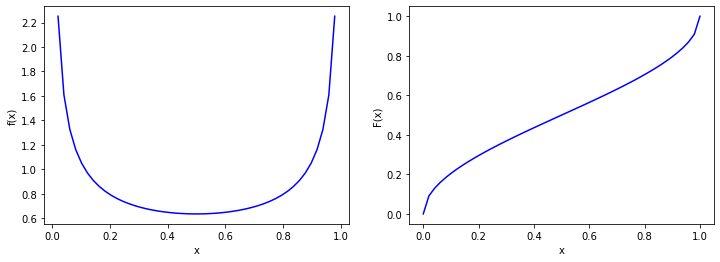

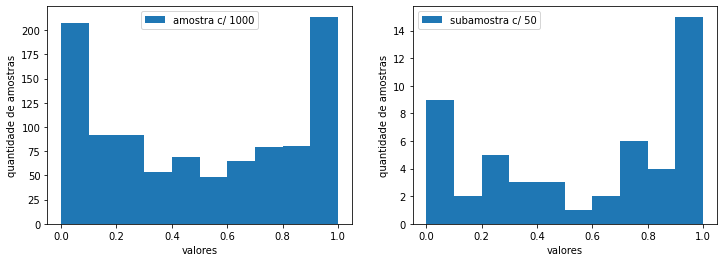

In [ ]:
#Faça um código para mostrar a PDF, a CDF e os histogramas
#de amostras geradas aleatoriamente
#Dica: você deve usar as funções que criamos anteriormente.

alpha = 0.5
beta = 0.5
x = np.linspace(0,1)
f = st.beta.pdf(x,alpha,beta)
F = st.beta.cdf(x,alpha,beta)
plotDistribuicaoCont(x,f,F)
dados = st.beta.rvs(alpha,beta,size=1000)
histograma(dados)

### Distribuição Weibull

**Contribuidores**
* 202006840039, Matheus Pantoja
* 202006840003, Matheus Marins

A distribuição Weibull é a distribuição mais comumente usada para modelar dados de confiabilidade. Esta distribuição é fácil de interpretar e muito versátil. A distribuição Weibull pode modelar dados que são assimétricos à direita, esquerda ou simétrica. É definida no intervalo de $[0,+\infty)$ e possui dois parâmetros $k \gt 0$, chamado de parâmetro de forma, e $\lambda \gt 0$, denominado parâmetro de escala.

* Média: $\lambda \Gamma(1+1/k)$, onde onde ${\Gamma (z)=\int _{0}^{\infty }t^{z-1}e^{-t}\,dt}$
* Variância: $\lambda^2\left[\Gamma\left(1+\frac{2}{k}\right) - \left(\Gamma\left(1+\frac{1}{k}\right)\right)^2\right]$
* Distribuição de probabilidade: $f(x)=\begin{cases}
\frac{k}{\lambda }(\frac {x}{\lambda })^{k-1}e^{-(\frac{x}{\lambda})^{k}},&x \geq 0\\
0,&x \lt 0
\end{cases}$
* Distribuição acumulada de probabilidade: $ F(x) = \begin{cases}1-e^{-(x/\lambda )^{k}},&x\geq 0,\\0,&x \lt 0.\end{cases}$

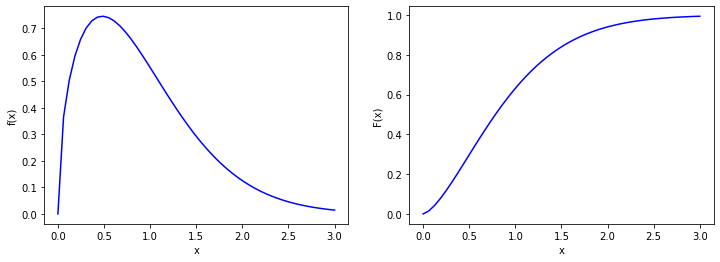

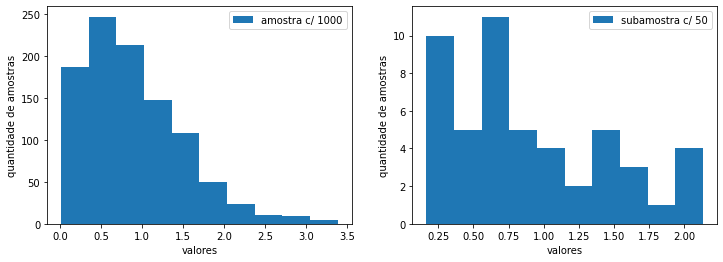

In [ ]:
#Faça um código para mostrar a PDF, a CDF e os histogramas
#de amostras geradas aleatoriamente
#Dica: você deve usar as funções que criamos anteriormente.

k = 1.5
lambd = 1
x = np.linspace(0,3)
f = st.weibull_min.pdf(x,k,scale=lambd)
F = st.weibull_min.cdf(x,k,scale=lambd)
plotDistribuicaoCont(x,f,F)
dados = st.weibull_min.rvs(k,scale=lambd,size=1000)
histograma(dados)

### Distribuição Erlang

**Contribuidores**
* 202006840008, Caio Brasil
* 202006840012, Lucas Queiroz Costa

A distribuição Erlang foi desenvolvida por Agner Krarup Erlang para analisar o número de chamadas telefônicas que poderiam ser feitas simultaneamente aos operadores das estações de comutação. Atualmente esta distribuição é utilizada em várias áreas que aplicam processos estocásticos.

No ponto de vista dos processos estocásticos, a distribuição Erlang é a distribuição da soma de $k>0$ variáveis aleatórias exponenciais com taxa $\lambda$, independentes e identicamente distribuídas. No caso em que $k=1$ a distribuição é exponencial. A distribuição Erlang também é um caso especial da distribuição Gama, quando $k$ é inteiro e $\lambda = \frac{1}{\theta}$.

* Média: $\frac {k}{\lambda }$
* Variância: $\frac {k}{\lambda^2}$
* Distribuição de probabilidade: $f(x) = \frac {\lambda ^{k}x^{k-1}e^{-\lambda x}}{(k-1)!}$
* Distribuição acumulada de probabilidade: $F(x)=\frac {\gamma (k,\lambda x)}{(k-1)!}$, onde $ \gamma(k,x) = \int_0^x t^{k-1}\,e^{-t}dt$


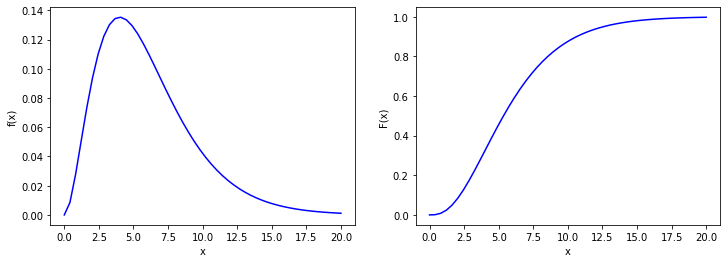

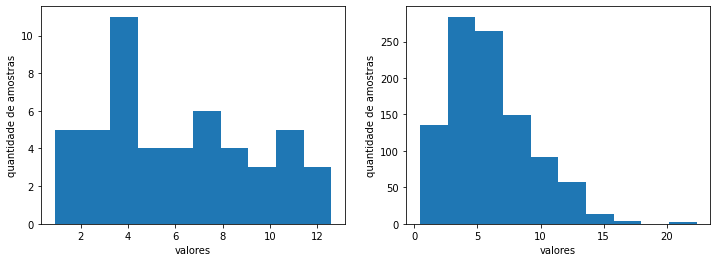

In [ ]:
#Faça um código para mostrar a PDF, a CDF e os histogramas
#de amostras geradas aleatoriamente
#Dica: você deve usar as funções que criamos anteriormente.

k = 3
lambd = 0.5 #não usar a variavel lambda porque é palavra reservada em Python
x = np.linspace(0,20)
f = st.erlang.pdf(x,k,scale=1/lambd)
F = st.erlang.cdf(x,k,scale=1/lambd)
plotDistribuicaoCont(x,f,F)
dados = st.erlang.rvs(k,scale=1/lambd,size=1000)
histograma(dados)